# 4.10 Coding Etiquette Reporting (Part 2)

### This script contains the following points:

### 1. Import Pandas and Dataframe

### 2. Create a new dataframe - Sum together prices to find total cost per order

**Continuation from previous Script**

### 9. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

##### 9.1 Aggregations by Age Group

##### 9.2 Aggregations by Dependants

##### 9.3 Aggregations by Income

##### 9.4 Orders_day_of_week

### 10. Compare your customer profiles with regions

##### 9.1 Comparing Age Group and Region

##### 9.2 Comparing Dependants and Region

##### 9.3 Comparing Dependants and Region

##### 9.4 Comparing Order_day_type and Region


### 11. Compare your customer profiles with departments

##### 11.2 Comparing Age Group and departments

##### 11.2.1 Top 5 Departments in Age Group - Young Adults

##### 11.2.2 Top 5 Departments in Age Group - Adults

##### 11.2.3 Top 5 Departments in Age Group - Older Adult

##### 11.2.4 Top 5 Departments in Age Group - Senior

### 11.3 Comparing Dependents Vs Non dependent customers and departments

##### 11.3.1 Top 10 Department - Dependents

##### 11.3.2 Top 5 Department - No Dependents


### 12. Questions and Answers

##### 12.1 Busiest Days of the week - Income

##### 12.1.1 Income Group - Busiest Days of the Week

##### 12.1.2 Income Group - Busiest Hour of the Day

###12.2.1 Dependents vs No Dependents - Busiest Days of the Week

##### 12.2.2 Dependents vs No Dependents - Busiest Hour of the Day

###13. Instacart has a lot of products with different price tags. Marketing and Sales want to use simplier price range groupings to help direct their efforts.

##### 13.1 Price Tags by Income Group

##### 13.2 Price Tags by Age Range











# 1. Import Pandas and Dataframe

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/content/drive/MyDrive/Careerfoundary'

In [3]:
df_ords_prods_cust_merge_keep = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','df_ords_prods_cust_merge_keep.pkl'))

In [4]:
df_ords_prods_cust_merge_keep.shape

(2648423, 38)

# 2. Create a new dataframe - Sum together prices to find total expenditure per order


In [5]:
# Create aggregated subset of data where the prices column is the total cost of each order:
orders_agg = df_ords_prods_cust_merge_keep.groupby(['user_id', 'age_group', 'income_class', 'dependants_flag', 'loyalty_flag', 'region','days_since_prior_order'])['prices'].sum().reset_index()


In [6]:
orders_agg2 = df_ords_prods_cust_merge_keep.groupby(['user_id', 'age_group', 'income_class', 'dependants_flag', 'loyalty_flag', 'region','days_since_prior_order', 'department_id','order_day_type'])['prices'].sum().reset_index()


In [7]:
# df_ords_prods_cust_merge_keep_total = df_ords_prods_cust_merge_keep.groupby(['user_id', 'age_group', 'income_class', 'dependants_flag', 'loyalty_flag', 'region','order_day_type', 'days_since_prior_order'])['prices'].sum().reset_index()

In [8]:
orders_agg.sort_values(by='prices')

,user_id,age_group,income_class,dependants_flag,loyalty_flag,region,days_since_prior_order,prices
0,3,Adult,Lower-Middle Class Income,Dependants,Loyal customer,midwest,0.0,0.000000
326469,84,Senior,Lower-Middle Class Income,No Dependants,New customer,west,8.0,0.000000
326468,84,Senior,Lower-Middle Class Income,No Dependants,New customer,west,7.0,0.000000
326467,84,Senior,Lower-Middle Class Income,No Dependants,New customer,west,6.0,0.000000
326466,84,Senior,Lower-Middle Class Income,No Dependants,New customer,west,5.0,0.000000
...,...,...,...,...,...,...,...,...
1836,3,Adult,Upper Class Income,Dependants,Regular customer,west,7.0,24828.337891
23877,9,Senior,Upper Class Income,Dependants,Loyal customer,south,7.0,24904.654297
164710,46,Older Adult,Upper Class Income,Dependants,Regular customer,northeast,7.0,25769.773438
443741,113,Senior,Upper Class Income,Dependants,Regular customer,south,7.0,25910.451172


In [9]:
df_ords_prods_cust_merge_keep.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'first_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'Busiest_Days(plural)',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'customer_frequency', 'frequency_flag', '_merge',
       'region', 'customer_activity_flag', 'age_group', 'dependants_flag',
       'income_class', 'order_day_type'],
      dtype='object')

In [10]:
df_ords_prods_cust_merge_keep.shape

(2648423, 38)

In [11]:
#how many rows have zero in prices column
df_ords_prods_cust_merge_keep[df_ords_prods_cust_merge_keep['prices'] == 0].shape

(367, 38)

In [12]:
#Sample of the prices column - returns random variables to check the prices column has sumed together
df_ords_prods_cust_merge_keep['prices'].sample(10)

1290624     9.203125
362711     14.101562
977634     12.796875
1228573     3.300781
1066826     8.898438
1491242     8.203125
447228     10.898438
1894319    10.703125
1790578    12.703125
2278684     6.601562
Name: prices, dtype: float16

In [13]:
df_ords_prods_cust_merge_keep[df_ords_prods_cust_merge_keep['prices'] > 10].shape

(860087, 38)

In [14]:
#Rename the prices column to total_orders
orders_agg.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [15]:
#Rename the prices column to total_orders (including order_day_type column)
orders_agg2.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [16]:
orders_agg.columns

Index(['user_id', 'age_group', 'income_class', 'dependants_flag',
       'loyalty_flag', 'region', 'days_since_prior_order', 'order_total'],
      dtype='object')

# 9. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.


# 9.1 Aggregations by Age Group

In [17]:
orders_agg.groupby('age_group').agg({'order_total': ['min', 'mean', 'max'], 'days_since_prior_order': ['min', 'mean', 'max']})

order_total                          days_since_prior_order        \
                    min       mean           max                    min  mean   
age_group                                                                       
Adult               0.0  43.327972  26465.136719                    0.0  15.0   
Older Adult         0.0  59.990395  25769.773438                    0.0  15.0   
Senior              0.0  41.255199  25910.451172                    0.0  15.0   
Young Adult         0.0  14.615612  23374.148438                    0.0  15.0   

                   
              max  
age_group          
Adult        30.0  
Older Adult  30.0  
Senior       30.0  
Young Adult  30.0

* We can see there is a huge range in terms of order total between the min value and the max values across all age ranges.

* The fact that the mean order_totals across age ranges are on the lower end shows there is likely a small number of higher totals pulling up the mean and creating a high max value.

* Older Adults had the highest average order total while young adults had the lowest.

* As the min mean and max are the same for all age ranges we cannot form any conclusions.

# 9.2 Aggregations by Dependants



In [18]:
orders_agg.groupby('dependants_flag').agg({'order_total': ['min', 'mean', 'max'], 'days_since_prior_order': ['min', 'mean', 'max']})

order_total                          days_since_prior_order  \
                        min       mean           max                    min   
dependants_flag                                                               
Dependants              0.0  56.497200  25910.451172                    0.0   
No Dependants           0.0  23.097391  26465.136719                    0.0   

                             
                 mean   max  
dependants_flag              
Dependants       15.0  30.0  
No Dependants    15.0  30.0

* Customers with dependant spend more in terms of order_total on average than those with no dependents. They also have a smaller range in terms of order_total that customers with no dependents.

* Again, no conclusions can be formed in terms of the consistency orders by looking at the data generated for days_since_prior_order.


# 9.3 Aggregations by Income

In [19]:
orders_agg.groupby('income_class').agg({'order_total': ['min', 'mean', 'max'], 'days_since_prior_order': ['min', 'mean', 'max']})

order_total                           \
                                  min       mean           max   
income_class                                                     
Lower-Middle Class Income         0.0  21.335133  24575.763672   
Median Class Income               0.0  15.327816  24766.580078   
Upper Class Income                0.0  82.728935  26465.136719   

                          days_since_prior_order              
                                             min  mean   max  
income_class                                                  
Lower-Middle Class Income                    0.0  15.0  30.0  
Median Class Income                          0.0  15.0  30.0  
Upper Class Income                           0.0  15.0  30.0

* We can see that on average the customers in the Upper Class Income category have a higher order total than the other age categories.

* Median class Income customers on average have the lowest order totals.

# 9.4 Orders_day_of_week

In [20]:
orders_agg2.groupby('order_day_type').agg({'order_total': ['min', 'mean', 'max'], 'days_since_prior_order': ['min', 'mean', 'max']})

order_total                         \
                                  min      mean          max   
order_day_type                                                 
Non-working day - weekend         0.0  0.692138  4306.386719   
Working days -weekdays            0.0  1.202972  6179.300781   

                          days_since_prior_order              
                                             min  mean   max  
order_day_type                                                
Non-working day - weekend                    0.0  15.0  30.0  
Working days -weekdays                       0.0  15.0  30.0

* We can see that on average there is a higer order total by customers on weekdays compared to weekends. We will investigate this further.

# 10. Compare your customer profiles with regions

# 10.1 Comparing Age Group and Region

By comparing these two columns we are able to see if there is a difference in age distribution of our customers by region. A bar histogram can clearly display the results.

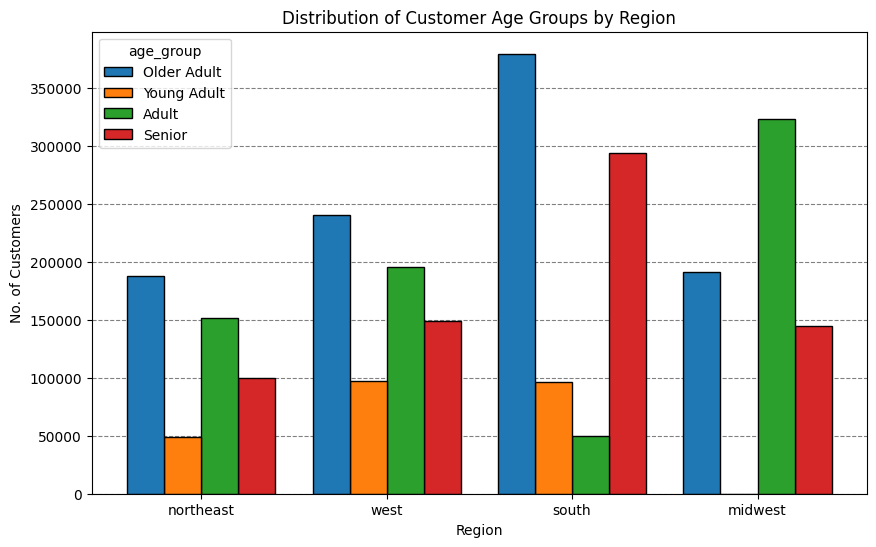

In [21]:
plt.figure(figsize=(10, 6))

# Plot the histogram bars
plot = sns.histplot(data=df_ords_prods_cust_merge_keep, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')

# Save and Show
plt.show()


*   The South has the largest proportion of older customers. They have the a larger percentage of Senior and Older customer compared to the other regions.

*   The Midwest has a very small Young Adult customer based compared to the other age categrories in this region. Infact, they have the smallest Young Adult customer base  compared to the other regions.

* The largest customer base in all other regions apart from the midwest is the Older Adult age category.


# 10.2 Comparing Dependants and Region

By comparing these two columns we are able to see if there is a difference in whether customers have/have not got dependants across regions. A histogram can clearly display the results.

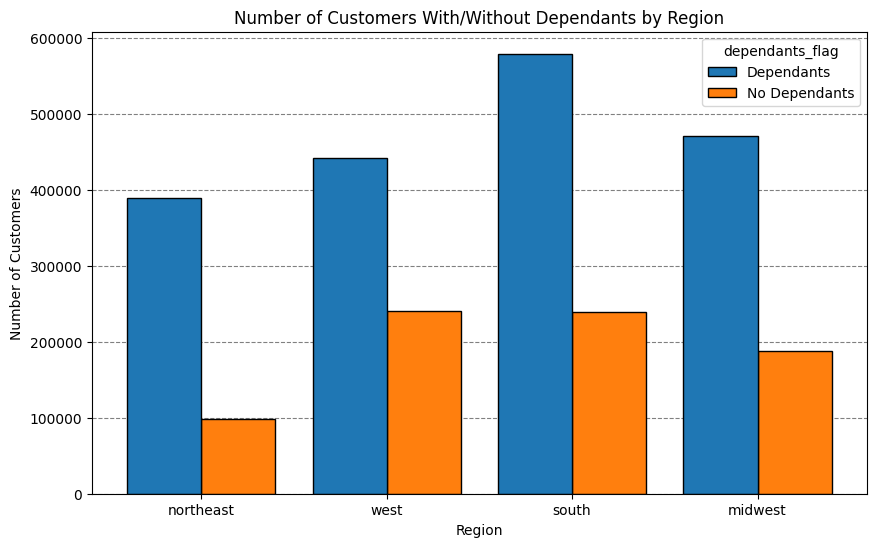

In [22]:
plt.figure(figsize=(10, 6))

# Plot the histogram bars
plot2 = sns.histplot(data=df_ords_prods_cust_merge_keep, x='region', hue='dependants_flag', multiple='dodge', shrink=.8, alpha=1)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Number of Customers With/Without Dependants by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')

# Show histogram
plt.show()


*   Customer across regions are more likely to have dependant than to not have dependants.
*   Northeast customer base has the smallest count of customers without dependants.
*   South has the largest count of customers with dependants across regions.



In [23]:
#Export the histogram
plot2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customers_With_Without_Dependants_by_Region.png'))

# 10.3 Income Class and Regions

By comparing these two columns we are able to see if there is a difference in income classification of customers across regions. A histogram can clearly display the results.


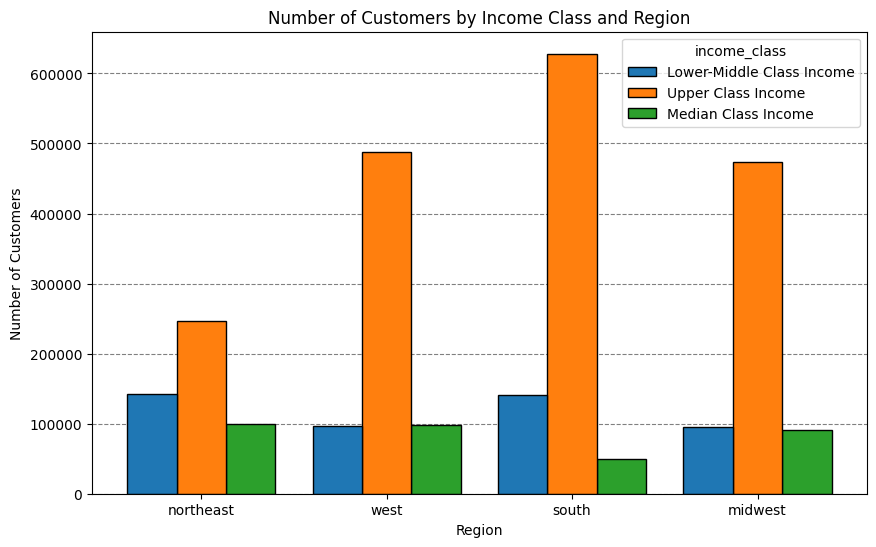

In [24]:
plt.figure(figsize=(10, 6))

# Plot the histogram bars
plot3 = sns.histplot(data=df_ords_prods_cust_merge_keep, x='region', hue='income_class', multiple='dodge', shrink=.8, alpha=1)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Number of Customers by Income Class and Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')

# Show
plt.show()

In [25]:
#Export the histogram
plot3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Number_of_Customers_With_Without_Dependants_by_Region.png'))

*   Across regions there are more customers in the Upper Class Income range.

*   The South as the smallest amount of customes on the Median Claas Income range.

* The South also has the highest amount of customers in the Upper Class Income range.





# 10.4 Comparing Order_day_type and Region

By comparing these two columns we are able to see if there is a difference in when customer choose the make a purchase. A histogram can clearly display the results.

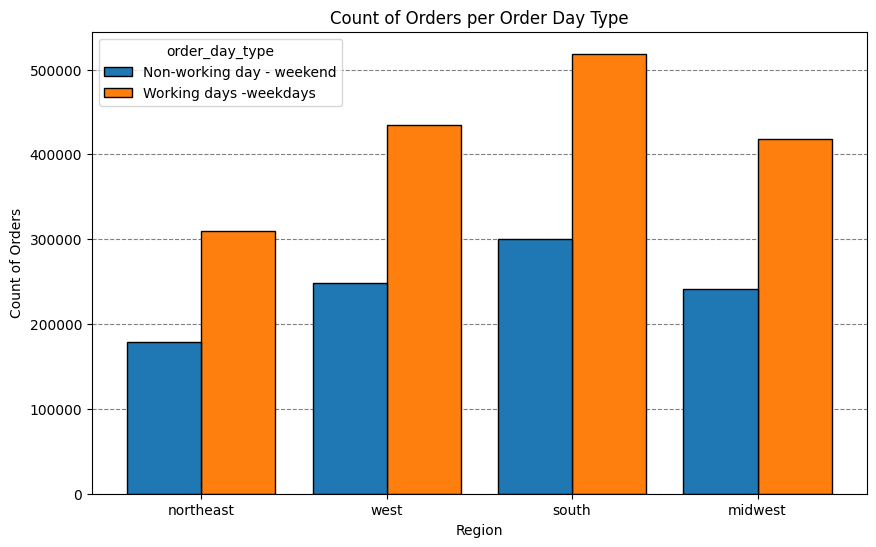

In [26]:
plt.figure(figsize=(10, 6))

# Plot the histogram bars
plot4 = sns.histplot(data=df_ords_prods_cust_merge_keep, x='region', hue='order_day_type', multiple='dodge', shrink=.8, alpha=1)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Count of Orders per Order Day Type')
plt.ylabel('Count of Orders')
plt.xlabel('Region')

# Show histogram
plt.show()

In [27]:
#Export the histogram
plot4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Count_of_Orders_per_Order_Day_Type.png'))

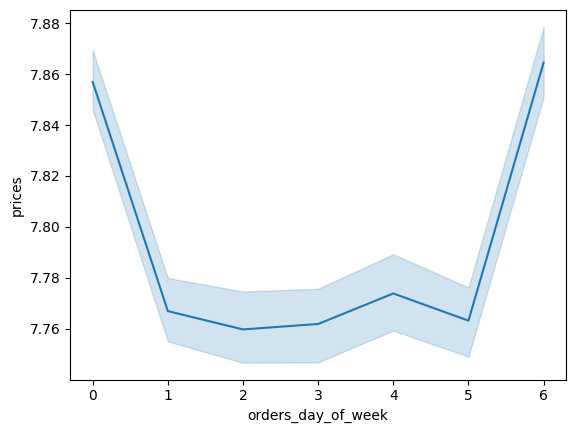

In [28]:
# This line graph shows order days of the week against aggregate prices
line = sns.lineplot(data = df_ords_prods_cust_merge_keep, x = 'orders_day_of_week',y = 'prices')

In [29]:
# Export line graph
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Total_orders_by_order_day_of_the week.png'))

1.   We can see across regions there are more orders made during the week compared to the weekend.
2.   We can see on the line chart that there is a spike in orders days 6 and 0 which are Friday and Saturday
**I found it unusual that more orders were made on week days. As we can see from the line chart most orders are made on Friday and Saturday meaning the weekday data is very skewed (high number of orders on Friday making it seem that customer oder more often during the week - this is not reflective of the data). Therefore I will not be using weekdays vs weekends as a customer profile.**



# 11. Compare your customer profiles with departments

Firstly, we only have data for the department id, we need to include the department name

In [30]:
#import the department database

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data','products.csv'))

In [31]:
df_dep.head(5)

,product_id,product_name,aisle_id,department_id,prices
0,1,Chocolate Sandwich Cookies,61,19,5.8
1,2,All-Seasons Salt,104,13,9.3
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,5,Green Chile Anytime Sauce,5,13,4.3


In [32]:
# Create new column usng the loc method showing department names (These are from scrift 4.4)

In [33]:
df_dep.loc[df_dep['department_id'] == 1, 'department_name'] = 'frozen'

In [34]:
df_dep.loc[df_dep['department_id'] == 2, 'department_name'] = 'other'

In [35]:
df_dep.loc[df_dep['department_id'] == 3, 'department_name'] = 'bakery'

In [36]:
df_dep.loc[df_dep['department_id'] == 4, 'department_name'] = 'produce'

In [37]:
df_dep.loc[df_dep['department_id'] == 5, 'department_name'] = 'alcohol'

In [38]:
df_dep.loc[df_dep['department_id'] == 6, 'department_name'] = 'international'

In [39]:
df_dep.loc[df_dep['department_id'] == 7, 'department_name'] = 'beverages'

In [40]:
df_dep.loc[df_dep['department_id'] == 8, 'department_name'] = 'pets'

In [41]:
df_dep.loc[df_dep['department_id'] == 9, 'department_name'] = 'dry goods pasta'

In [42]:
df_dep.loc[df_dep['department_id'] == 10, 'department_name'] = 'bulk'

In [43]:
df_dep.loc[df_dep['department_id'] == 11, 'department_name'] = 'personal care'

In [44]:
df_dep.loc[df_dep['department_id'] == 12, 'department_name'] = 'meat seafood'

In [45]:
df_dep.loc[df_dep['department_id'] == 13, 'department_name'] = 'pantry'

In [46]:
df_dep.loc[df_dep['department_id'] == 14, 'department_name'] = 'breakfast'

In [47]:
df_dep.loc[df_dep['department_id'] == 15, 'department_name'] = 'canned goods'

In [48]:
df_dep.loc[df_dep['department_id'] == 16, 'department_name'] = 'dairy eggs'

In [49]:
df_dep.loc[df_dep['department_id'] == 17, 'department_name'] = 'household'

In [50]:
df_dep.loc[df_dep['department_id'] == 18, 'department_name'] = 'babies'

In [51]:
df_dep.loc[df_dep['department_id'] == 19, 'department_name'] = 'snacks'

In [52]:
df_dep.loc[df_dep['department_id'] == 20, 'department_name'] = 'deli'

In [53]:
df_dep.loc[df_dep['department_id'] == 21, 'department_name'] = 'missing'

In [54]:
df_dep['department_name'].value_counts(dropna = False)

department_name
personal care      6565
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
bakery             1516
deli               1322
missing            1258
international      1139
breakfast          1116
babies             1081
alcohol            1056
pets                972
meat seafood        907
other               548
bulk                 38
Name: count, dtype: int64

In [55]:
df_dep.head(5)

,product_id,product_name,aisle_id,department_id,prices,department_name
0,1,Chocolate Sandwich Cookies,61,19,5.8,snacks
1,2,All-Seasons Salt,104,13,9.3,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5,frozen
4,5,Green Chile Anytime Sauce,5,13,4.3,pantry


In [56]:
#There are 16 missing values in product name, we saw earlier there are 16 missing product names in Script 4.5
df_dep.isnull(). sum()

product_id          0
product_name       16
aisle_id            0
department_id       0
prices              0
department_name     0
dtype: int64

In [57]:
df_dep.shape

(49693, 6)

In [58]:
df_dep.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'department_name'],
      dtype='object')

In [59]:
# We will remove the rows with missing values

In [60]:
df_nan = df_dep[df_dep['product_name'].isnull() == True]

In [61]:
df_nan

,product_id,product_name,aisle_id,department_id,prices,department_name
33,34,NaN,121,14,12.2,breakfast
68,69,NaN,26,7,11.8,beverages
115,116,NaN,93,3,10.8,bakery
261,262,NaN,110,13,12.1,pantry
525,525,NaN,109,11,1.2,personal care
1511,1511,NaN,84,16,14.3,dairy eggs
1780,1780,NaN,126,11,12.3,personal care
2240,2240,NaN,52,1,14.2,frozen
2586,2586,NaN,104,13,12.4,pantry
3159,3159,NaN,126,11,13.1,personal care


In [62]:

df_dep_clean = df_dep[df_dep['product_name'].isnull()== False]

In [63]:
#df_dep_clean['department_name'].value_counts(dropna = False)

columns_to_keep = ['product_id', 'aisle_id', 'department_id', 'department_name']


In [64]:
#There are now no missing values
df_dep_clean.isnull(). sum()

product_id         0
product_name       0
aisle_id           0
department_id      0
prices             0
department_name    0
dtype: int64

In [65]:
df_dep_clean.shape

(49677, 6)

In [66]:
# We do not want duplicate columns


In [67]:
# Making sure the data type is int32 so we can merge the dataframes on department_id
df_dep_clean['department_id'] = df_dep_clean['department_id'].astype ('int32')

<ipython-input-67-4ba82604e3e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep_clean['department_id'] = df_dep_clean['department_id'].astype ('int32')


In [68]:
# I have now made sure we do not have mixed data types

In [69]:
# Merge department data with the df_ords_prods_cust_merge_keep dataframe so we can see the department names
# Merge the dataframes on department_id

In [70]:
df_dep_clean.shape

(49677, 6)

In [71]:
df_ords_prods_cust_merge_keep.shape

(2648423, 38)

In [72]:
# Due to RAM issues I have shrunk the dataframe to 8000 lines
df_ords_prods_cust_final = df_ords_prods_cust_merge_keep.sample(7000, random_state = 100)

In [73]:
df_ords_prods_cust_final.shape

(7000, 38)

In [74]:
# make sure df_ords_prods_cust_merge_keep department_id has the same dtype as df_dep_sample (both int32)
df_ords_prods_cust_final.dtypes

user_id                      int64
gender                    category
state                     category
age                          int64
date_joined                 object
n_dependants                 int64
marital_status            category
income                       int64
order_id                     int16
order_number                  int8
orders_day_of_week            int8
order_hour_of_day             int8
days_since_prior_order     float64
first_order               category
product_id                   int16
add_to_cart_order             int8
reordered                     int8
product_name                object
aisle_id                     int32
department_id                int32
prices                     float16
price_range_loc             object
busiest_day               category
Busiest_Days(plural)      category
busiest_period_of_day       object
max_order                    int64
loyalty_flag              category
mean_price                 float32
spending_flag       

In [75]:
# We do not need all of the columns in df_dep_clean, we will make a new dataframe with only the columns needed
df_dep_clean.columns


Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'department_name'],
      dtype='object')

In [76]:
df_dep_clean_final = df_dep_clean[['department_id','department_name']]

In [77]:
df_dep_clean_final.shape


(49677, 2)

In [78]:
df_ords_prods_cust_final.shape

(7000, 38)

In [79]:
#df_final = pd.merge(df_ords_prods_cust_final, df_dep_clean_final, how='left', on = 'department_id', indicator='merge2')

In [80]:
df_final = pd.merge(df_ords_prods_cust_final, df_dep_clean_final, on = 'department_id', indicator='merge2')

In [81]:
df_final.head()

,user_id,gender,state,age,date_joined,n_dependants,marital_status,income,order_id,order_number,...,frequency_flag,_merge,region,customer_activity_flag,age_group,dependants_flag,income_class,order_day_type,department_name,merge2
0,53,Female,Alaska,38,3/16/2018,0,single,70699,21597,4,...,Regular customer,both,west,keep,Adult,No Dependants,Median Class Income,Non-working day - weekend,produce,both
1,53,Female,Alaska,38,3/16/2018,0,single,70699,21597,4,...,Regular customer,both,west,keep,Adult,No Dependants,Median Class Income,Non-working day - weekend,produce,both
2,53,Female,Alaska,38,3/16/2018,0,single,70699,21597,4,...,Regular customer,both,west,keep,Adult,No Dependants,Median Class Income,Non-working day - weekend,produce,both
3,53,Female,Alaska,38,3/16/2018,0,single,70699,21597,4,...,Regular customer,both,west,keep,Adult,No Dependants,Median Class Income,Non-working day - weekend,produce,both
4,53,Female,Alaska,38,3/16/2018,0,single,70699,21597,4,...,Regular customer,both,west,keep,Adult,No Dependants,Median Class Income,Non-working day - weekend,produce,both


In [82]:
df_final.shape

(21023676, 40)

In [83]:
df_final.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'first_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'Busiest_Days(plural)',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'customer_frequency', 'frequency_flag', '_merge',
       'region', 'customer_activity_flag', 'age_group', 'dependants_flag',
       'income_class', 'order_day_type', 'department_name', 'merge2'],
      dtype='object')

In [84]:
#Checking the merge is successful
df_final['merge2'].value_counts(dropna = False)

merge2
both          21023676
left_only            0
right_only           0
Name: count, dtype: int64

# 11.2 Comparing Age Group and departments

---



By comparing these two columns we are able to see if there is a difference in the departments products are purchased from depending on customer age group. This will be dislayed on a histogram


# 11.2.1 Top 5 Departments in Age Group - Young Adults

In [85]:
# We want to see which departments generate the most expenditure.

In [86]:
df_final.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'first_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'Busiest_Days(plural)',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'customer_frequency', 'frequency_flag', '_merge',
       'region', 'customer_activity_flag', 'age_group', 'dependants_flag',
       'income_class', 'order_day_type', 'department_name', 'merge2'],
      dtype='object')

In [87]:
orders_agg_age = df_final.groupby(['age_group','department_name'])['prices'].sum().reset_index()


In [88]:
orders_agg_age.head(5)

,age_group,department_name,prices
0,Adult,alcohol,7.961869e+04
1,Adult,babies,2.273457e+05
2,Adult,bakery,8.858267e+05
3,Adult,beverages,5.681908e+06
4,Adult,breakfast,4.003982e+05


In [89]:
# Specify the age group for which you want to find top departments
specific_age_group = 'Young Adult'

In [90]:
# Filter data for the specific age group
filtered_data = orders_agg_age[orders_agg_age['age_group'] == 'Young Adult']

In [91]:
filtered_data.head()

,age_group,department_name,prices
61,Young Adult,alcohol,7.158525e+04
62,Young Adult,babies,1.267937e+05
63,Young Adult,bakery,2.355884e+05
64,Young Adult,beverages,1.439700e+06
65,Young Adult,breakfast,1.693689e+05


In [92]:
# Sort by aggregate prices in descending order and select top 5
top_departments = filtered_data.sort_values(by='prices', ascending=False).head(5)

In [93]:
top_departments.head(5)

,age_group,department_name,prices
68,Young Adult,dairy eggs,3902199.250
79,Young Adult,produce,2275521.500
76,Young Adult,pantry,1531717.000
64,Young Adult,beverages,1439700.500
71,Young Adult,frozen,1396454.875


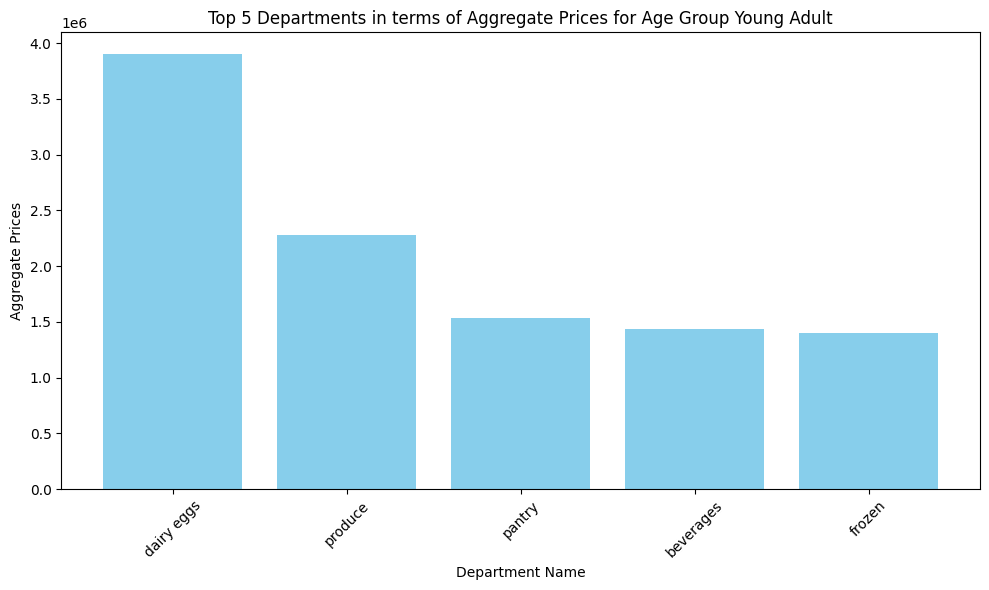

In [174]:
#Create a bar chart to display the results

plt.figure(figsize=(10, 6))

plt.bar(top_departments['department_name'], top_departments['prices'], color='skyblue')

plt.xlabel('Department Name')
plt.ylabel('Aggregate Prices')
plt.title(f'Top 5 Departments in terms of Aggregate Prices for Age Group Young Adult')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()

In [172]:
#Export the bar chart

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Top_5_Department_Aggregate_Prices_Age Group_Senior4.png'), bbox_inches = 'tight')

<Figure size 640x480 with 0 Axes>

In [96]:
filename = 'Top_5_Department_Aggregate_Prices_Age_Group_Senior.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)


We can see that dairy eggs is the most popular category among Young Adults. Young Adults spennd the most on dairy eggs.

# 11.2.2 Top 5 Departments in Age Group - Adults

In [97]:
# Specify the age group for which you want to find top departments
specific_age_group = 'Adult'

In [98]:
# Filter data for the specific age group
filtered_data2 = orders_agg_age[orders_agg_age['age_group'] == 'Adult']

In [99]:
filtered_data2.head()

,age_group,department_name,prices
0,Adult,alcohol,7.961869e+04
1,Adult,babies,2.273457e+05
2,Adult,bakery,8.858267e+05
3,Adult,beverages,5.681908e+06
4,Adult,breakfast,4.003982e+05


In [100]:
# Sort by aggregate prices in descending order and select top 5
top_departments2 = filtered_data2.sort_values(by='prices', ascending=False).head(5)

In [101]:
top_departments2

,age_group,department_name,prices
6,Adult,dairy eggs,10162985.0
17,Adult,produce,7419829.0
3,Adult,beverages,5681908.5
14,Adult,pantry,5232667.0
18,Adult,snacks,4673635.0


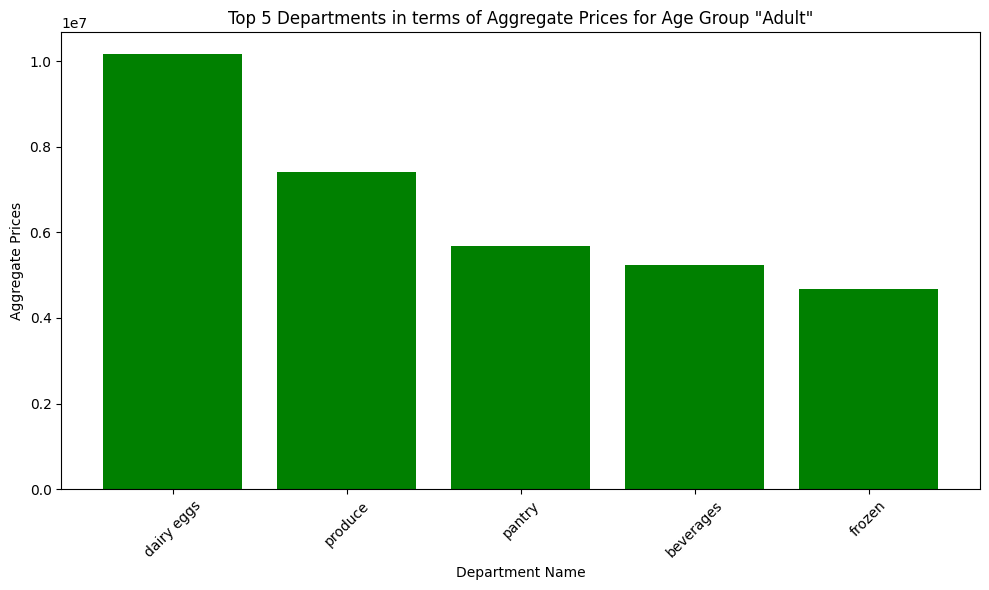

In [102]:
plt.figure(figsize=(10, 6))
plt.bar(top_departments['department_name'], top_departments2['prices'], color='green')
plt.xlabel('Department Name')
plt.ylabel('Aggregate Prices')
plt.title(f'Top 5 Departments in terms of Aggregate Prices for Age Group "{specific_age_group}"')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We have the same top 5 departments among the Adult age group

# 11.2.3 Top 5 Departments in Age Group - Older Adult

In [103]:
# Specify the age group for which you want to find top departments
specific_age_group = 'Older Adult'

In [104]:
# Filter data for the specific age group
filtered_data3 = orders_agg_age[orders_agg_age['age_group'] == 'Older Adult']

In [105]:
filtered_data3.head()

,age_group,department_name,prices
19,Older Adult,alcohol,1.058042e+05
20,Older Adult,babies,2.837530e+05
21,Older Adult,bakery,1.445850e+06
22,Older Adult,beverages,7.290782e+06
23,Older Adult,breakfast,5.356530e+05


In [106]:
# Sort by aggregate prices in descending order and select top 5
top_departments3 = filtered_data2.sort_values(by='prices', ascending=False).head(5)

In [107]:
top_departments3

,age_group,department_name,prices
6,Adult,dairy eggs,10162985.0
17,Adult,produce,7419829.0
3,Adult,beverages,5681908.5
14,Adult,pantry,5232667.0
18,Adult,snacks,4673635.0


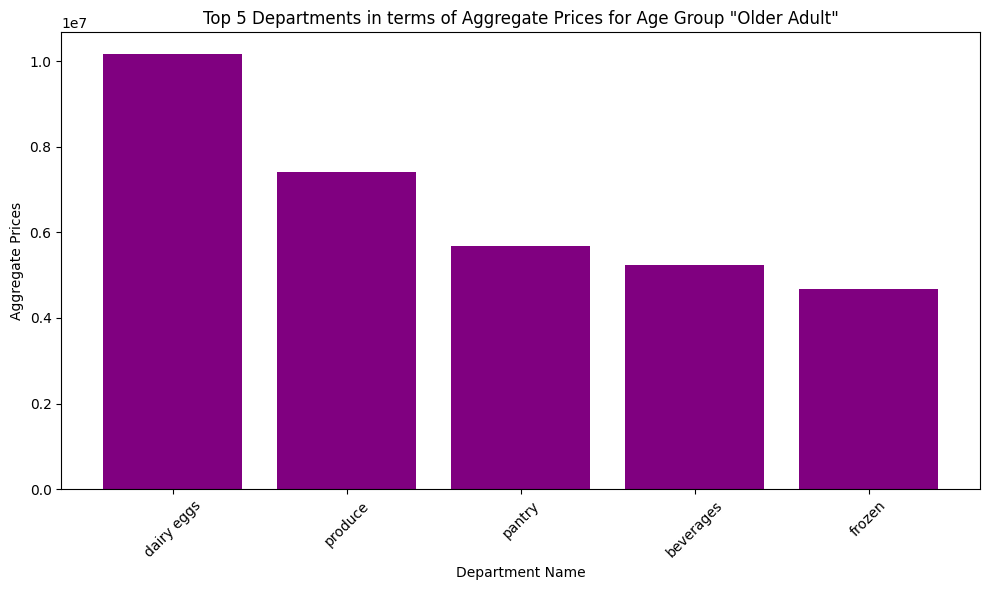

In [108]:
plt.figure(figsize=(10, 6))
plt.bar(top_departments['department_name'], top_departments3['prices'], color='purple')
plt.xlabel('Department Name')
plt.ylabel('Aggregate Prices')
plt.title(f'Top 5 Departments in terms of Aggregate Prices for Age Group "{specific_age_group}"')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We have very similar results for the Older Adult age group.

# 11.2.4 Top 5 Departments in Age Group - Senior

In [109]:
# Specify the age group for which you want to find top departments
specific_age_group = 'Senior'

In [110]:
# Filter data for the specific age group
filtered_data4 = orders_agg_age[orders_agg_age['age_group'] == 'Senior']

In [111]:
filtered_data4.head()

,age_group,department_name,prices
40,Senior,alcohol,1.348524e+05
41,Senior,babies,2.405204e+05
42,Senior,bakery,8.482210e+05
43,Senior,beverages,5.261224e+06
44,Senior,breakfast,3.132094e+05


In [112]:
# Sort by aggregate prices in descending order and select top 5
top_departments4 = filtered_data4.sort_values(by='prices', ascending=False).head(5)

In [113]:
top_departments4

,age_group,department_name,prices
47,Senior,dairy eggs,8631448.0
59,Senior,produce,7243415.0
43,Senior,beverages,5261224.0
60,Senior,snacks,4345411.5
56,Senior,pantry,4123392.0


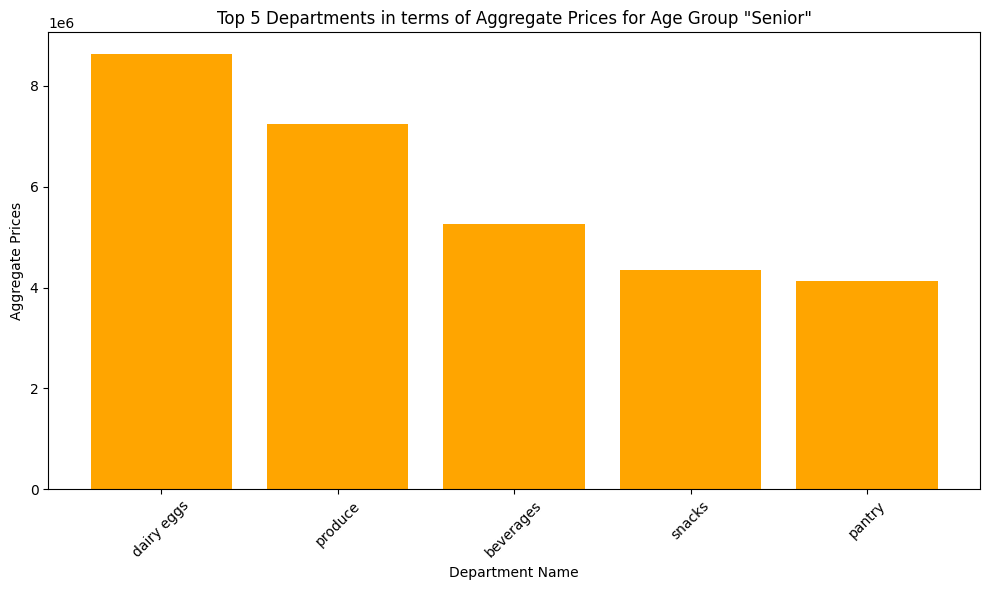

In [114]:
plt.figure(figsize=(10, 6))
plt.bar(top_departments4['department_name'], top_departments4['prices'], color='orange')
plt.xlabel('Department Name')
plt.ylabel('Aggregate Prices')
plt.title(f'Top 5 Departments in terms of Aggregate Prices for Age Group "{specific_age_group}"')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We have very similar results in the Senior age group however, we can see that snacks are also very popular in this age group.

# 11.3 Comparing Dependents Vs Non dependent customers and departments

In [115]:
df_final.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'first_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'Busiest_Days(plural)',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'customer_frequency', 'frequency_flag', '_merge',
       'region', 'customer_activity_flag', 'age_group', 'dependants_flag',
       'income_class', 'order_day_type', 'department_name', 'merge2'],
      dtype='object')

In [116]:
#Create a new dataframe for dependents VS non dependant, departments and Aggregate prices column
orders_agg_dependants = df_final.groupby(['dependants_flag','department_name'])['prices'].sum().reset_index()

# 11.3.1 Top 10 Department - Dependents

In [117]:
# Specify category
specific_group1 = 'Dependants'

In [118]:
# Filter data for the specific category - top 10
filtered_data5 = orders_agg_dependants[orders_agg_dependants['dependants_flag'] == 'Dependants']

In [119]:
filtered_data5.head()

,dependants_flag,department_name,prices
0,Dependants,alcohol,2.482569e+05
1,Dependants,babies,5.486001e+05
2,Dependants,bakery,2.413180e+06
3,Dependants,beverages,1.407778e+07
4,Dependants,breakfast,1.028822e+06


In [120]:
# Sort by aggregate prices in descending order and select top 10
top_departments5 = filtered_data5.sort_values(by='prices', ascending=False).head(10)

In [121]:
top_departments5

,dependants_flag,department_name,prices
7,Dependants,dairy eggs,24899844.00
19,Dependants,produce,19735388.00
3,Dependants,beverages,14077782.00
16,Dependants,pantry,11874734.00
20,Dependants,snacks,11460288.00
10,Dependants,frozen,10845799.00
17,Dependants,personal care,2686530.25
6,Dependants,canned goods,2477195.75
2,Dependants,bakery,2413180.50
11,Dependants,household,2385018.25


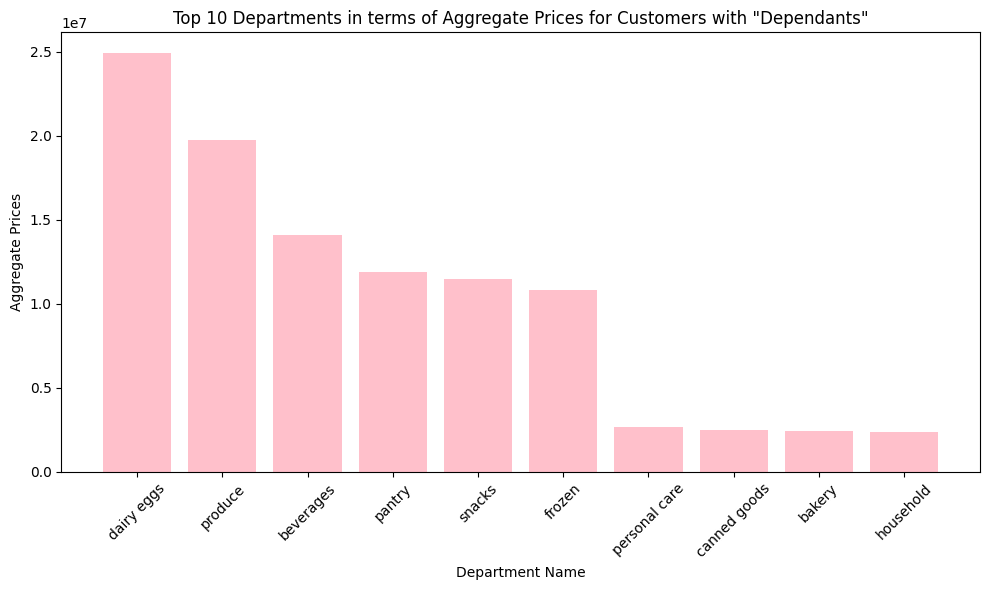

In [122]:
plt.figure(figsize=(10, 6))
plt.bar(top_departments5['department_name'], top_departments5['prices'], color='pink')
plt.xlabel('Department Name')
plt.ylabel('Aggregate Prices')
plt.title(f'Top 10 Departments in terms of Aggregate Prices for Customers with "{specific_group1}"')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 11.3.2 Top 5 Department - No Dependents

In [123]:
# Specify category
specific_group2 = 'No Dependants'

In [124]:
# Filter data for the specific category - top 10
filtered_data6 = orders_agg_dependants[orders_agg_dependants['dependants_flag'] == 'No Dependants']

In [125]:
filtered_data6.head()

,dependants_flag,department_name,prices
21,No Dependants,alcohol,1.436036e+05
22,No Dependants,babies,3.298127e+05
23,No Dependants,bakery,1.002306e+06
24,No Dependants,beverages,5.595833e+06
25,No Dependants,breakfast,3.898079e+05


In [126]:
# Sort by aggregate prices in descending order and select top 10
top_departments6 = filtered_data6.sort_values(by='prices', ascending=False).head(10)

In [127]:
top_departments6

,dependants_flag,department_name,prices
28,No Dependants,dairy eggs,1.004831e+07
40,No Dependants,produce,7.946143e+06
24,No Dependants,beverages,5.595833e+06
37,No Dependants,pantry,4.986789e+06
31,No Dependants,frozen,4.350915e+06
41,No Dependants,snacks,4.242098e+06
38,No Dependants,personal care,1.308427e+06
32,No Dependants,household,1.174472e+06
23,No Dependants,bakery,1.002306e+06
27,No Dependants,canned goods,8.583697e+05


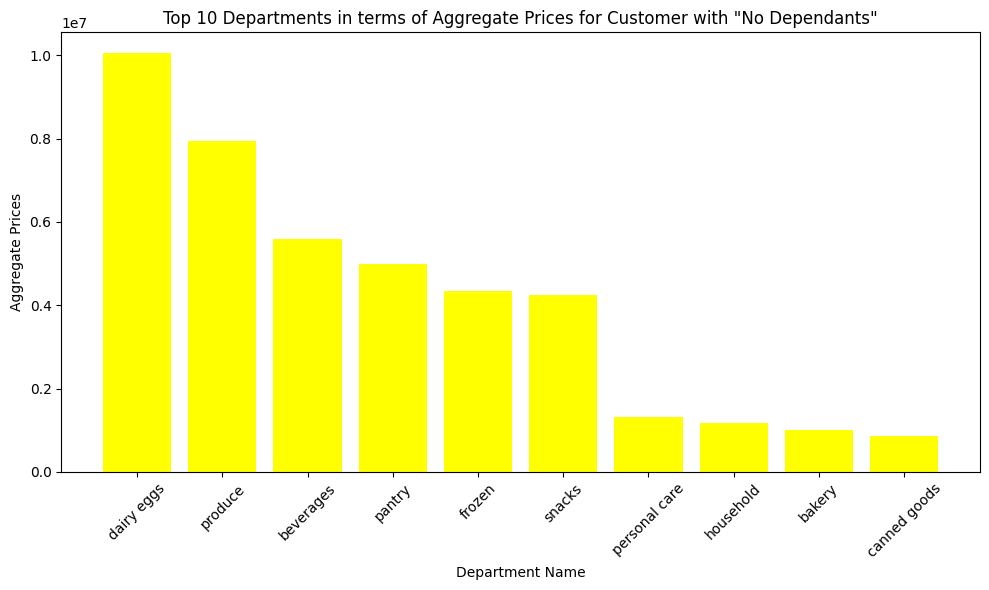

In [128]:
plt.figure(figsize=(10, 6))
plt.bar(top_departments6['department_name'], top_departments6['prices'], color='yellow')
plt.xlabel('Department Name')
plt.ylabel('Aggregate Prices')
plt.title(f'Top 10 Departments in terms of Aggregate Prices for Customer with "{specific_group2}"')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that customers with dependents and those without spend in similar departments. Notably, those with dependant spend more on snacks and canned goods compared to other categories. Those with no dependant spend more on frozen goods compared to other categories compared to those with dependents.

In [129]:
# Export the final dataframe

# 12. Questions and Answers

12.1 Busiest Days of the week - Income

The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

In [130]:
# See line graph in 10.4, the busiest days of the week for orders are Friday and Saturday

In [131]:
# Overall Busisest hour of the day

In [132]:
orders_agg_busiest_hour = df_final.groupby('order_hour_of_day')['prices'].sum().reset_index()

In [133]:
orders_agg_busiest_hour.head()

,order_hour_of_day,prices
0,0,1.366704e+06
1,1,6.980001e+05
2,2,5.134411e+05
3,3,1.959057e+05
4,4,3.296490e+05


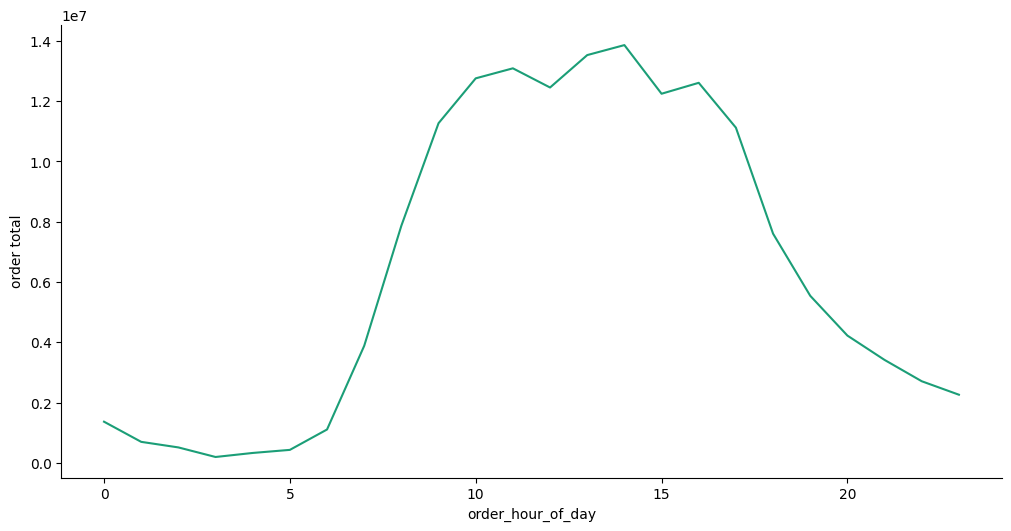

In [134]:
# @title Order Total at Hours of the Day

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_hour_of_day']
  ys = series['prices']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = orders_agg_busiest_hour.sort_values('order_hour_of_day', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_hour_of_day')
_ = plt.ylabel('order total')

# 12.1.1 Income Group - Busiest Days of the Week


In [135]:
# Lets see if this is the case when looking at different customer groups

In [136]:
df_final.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'first_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'Busiest_Days(plural)',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'customer_frequency', 'frequency_flag', '_merge',
       'region', 'customer_activity_flag', 'age_group', 'dependants_flag',
       'income_class', 'order_day_type', 'department_name', 'merge2'],
      dtype='object')

In [137]:
df_final['income_class'].value_counts(dropna = False)

income_class
Upper Class Income           14597931
Lower-Middle Class Income     3729980
Median Class Income           2695765
Name: count, dtype: int64

In [138]:
orders_agg_income_line = df_final.groupby(['income_class','orders_day_of_week'])['prices'].sum().reset_index()

In [139]:
orders_agg_income_line.head()

,income_class,orders_day_of_week,prices
0,Lower-Middle Class Income,0,5158087.00
1,Lower-Middle Class Income,1,4240346.50
2,Lower-Middle Class Income,2,4108470.00
3,Lower-Middle Class Income,3,3233620.25
4,Lower-Middle Class Income,4,3686051.75


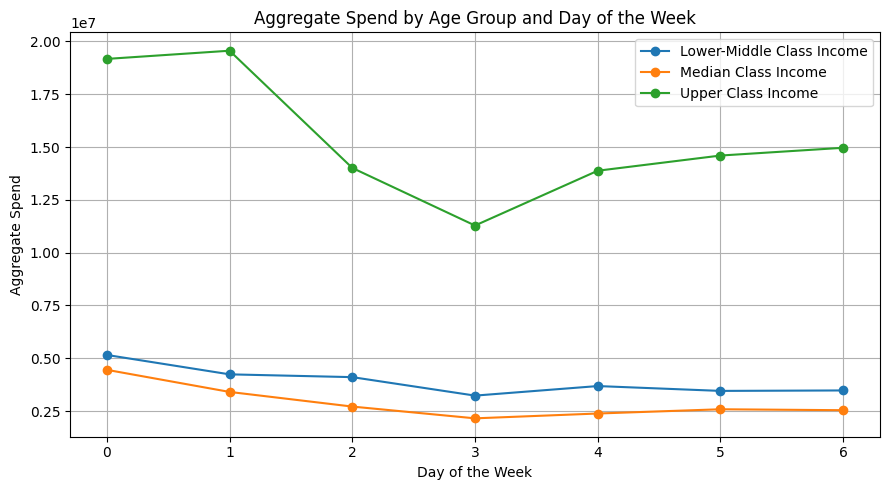

In [140]:
# Create a figure and axis
plt.figure(figsize=(9, 5))

# Plot lines for each income_class
for income_class, group_data in orders_agg_income_line.groupby('income_class'):
    plt.plot(group_data['orders_day_of_week'], group_data['prices'], marker='o', label=income_class)

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Aggregate Spend')
plt.title('Aggregate Spend by Age Group and Day of the Week')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Income Class: Lower-Middle Class Income
                income_class  orders_day_of_week      prices
0  Lower-Middle Class Income                   0  5158087.00
1  Lower-Middle Class Income                   1  4240346.50
2  Lower-Middle Class Income                   2  4108470.00
3  Lower-Middle Class Income                   3  3233620.25
4  Lower-Middle Class Income                   4  3686051.75
5  Lower-Middle Class Income                   5  3456658.25
6  Lower-Middle Class Income                   6  3478341.50
Income Class: Median Class Income
           income_class  orders_day_of_week      prices
7   Median Class Income                   0  4454076.50
8   Median Class Income                   1  3408232.00
9   Median Class Income                   2  2715106.50
10  Median Class Income                   3  2157858.00
11  Median Class Income                   4  2386461.75
12  Median Class Income                   5  2587393.25
13  Median Class Income                   6  2

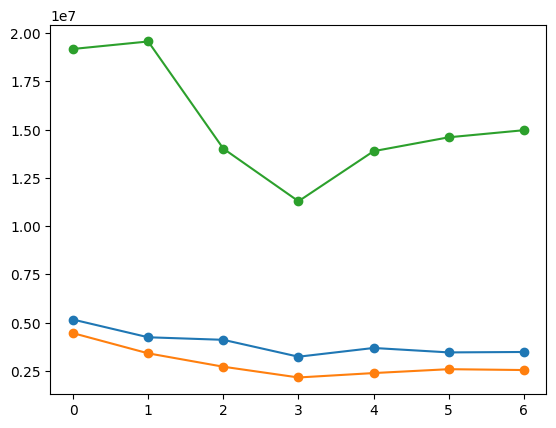

In [141]:
# Debugging print statements
for income_class, group_data in orders_agg_income_line.groupby('income_class'):
    print(f"Income Class: {income_class}")
    print(group_data)  # Print group data to inspect content

    plt.plot(group_data['orders_day_of_week'], group_data['prices'], marker='o', label=income_class)

*   We can see that among Median Class and Lower Median Class income customers there there is not a much fluctuation in the days of the week more orders take place. However we can see that Saturday is the most popular day on among these groups.

*   Among the Upper Class Income earners we can sew much more fluctation. The most popular day to make orders in Sunday with Saturday following. Another popular day is Friday.

* The least popular day among the Upper Class earners to make an order is Tuesday.

# 12.1.2 Income Group - Busiest Hour of the Day

In [142]:
orders_agg_busiest_hour_income = df_final.groupby(['order_hour_of_day', 'income_class'])['prices'].sum().reset_index()

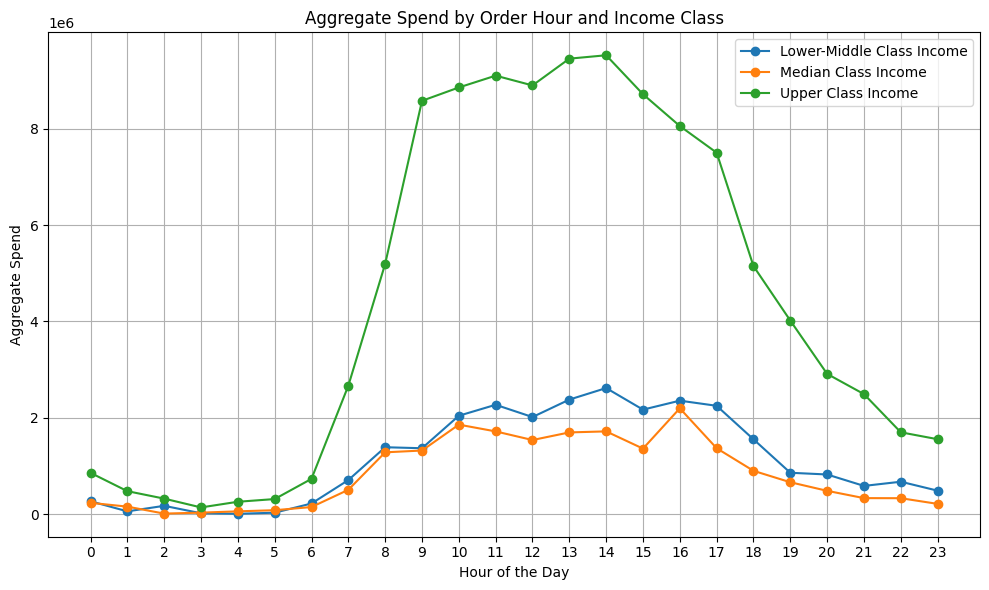

In [143]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot lines for each income_class
for income_class, group_data in orders_agg_busiest_hour_income.groupby('income_class'):
    plt.plot(group_data['order_hour_of_day'], group_data['prices'], marker='o', label=income_class)

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Aggregate Spend')
plt.title('Aggregate Spend by Order Hour and Income Class')
plt.xticks(range(24))  # Assuming 24-hour format
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

We can see among all income groups the hours of he day with the highest total orders are between 9- 5 which are typical working hours. The orders total begins to fall drastically among all income groups after 5pm.


# 12.2.1 Dependents vs No Dependents - Busiest Days of the Week

In [144]:
df_final.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'first_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'Busiest_Days(plural)',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'customer_frequency', 'frequency_flag', '_merge',
       'region', 'customer_activity_flag', 'age_group', 'dependants_flag',
       'income_class', 'order_day_type', 'department_name', 'merge2'],
      dtype='object')

In [145]:
orders_agg_busiest_day_dependents = df_final.groupby(['orders_day_of_week', 'dependants_flag'])['prices'].sum().reset_index()

In [146]:
orders_agg_busiest_day_dependents.head()

,orders_day_of_week,dependants_flag,prices
0,0,Dependants,20416446.0
1,0,No Dependants,8368678.5
2,1,Dependants,19999692.0
3,1,No Dependants,7209665.0
4,2,Dependants,14859961.0


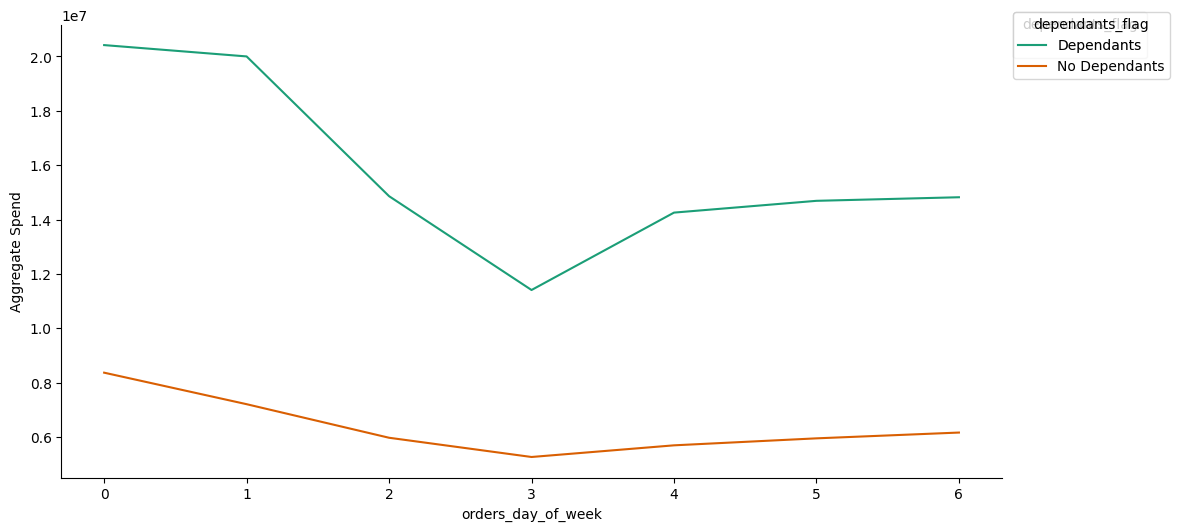

In [147]:
# @title Aggregate Spend by Dependents VS No Dependents - Days of the Week

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['orders_day_of_week']
  ys = series['prices']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = orders_agg_busiest_day_dependents.sort_values('orders_day_of_week', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('dependants_flag')):
  _plot_series(series, series_name, i)
  fig.legend(title='dependants_flag', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('orders_day_of_week')
_ = plt.ylabel('Aggregate Spend')

We can see a similar pattern in terms of popular order days. Among those with dependents vs those with no dependents: Friday and Saturday. Tuesday is not a popular order day in both groups.


# 12.2.2 Dependents vs No Dependents - Busiest Hour of the Day

In [148]:
orders_agg_busiest_hour_dependents = df_final.groupby(['order_hour_of_day', 'dependants_flag'])['prices'].sum().reset_index()

In [149]:
orders_agg_busiest_hour_dependents.head()

,order_hour_of_day,dependants_flag,prices
0,0,Dependants,1.043427e+06
1,0,No Dependants,3.232777e+05
2,1,Dependants,4.566786e+05
3,1,No Dependants,2.413215e+05
4,2,Dependants,3.123939e+05


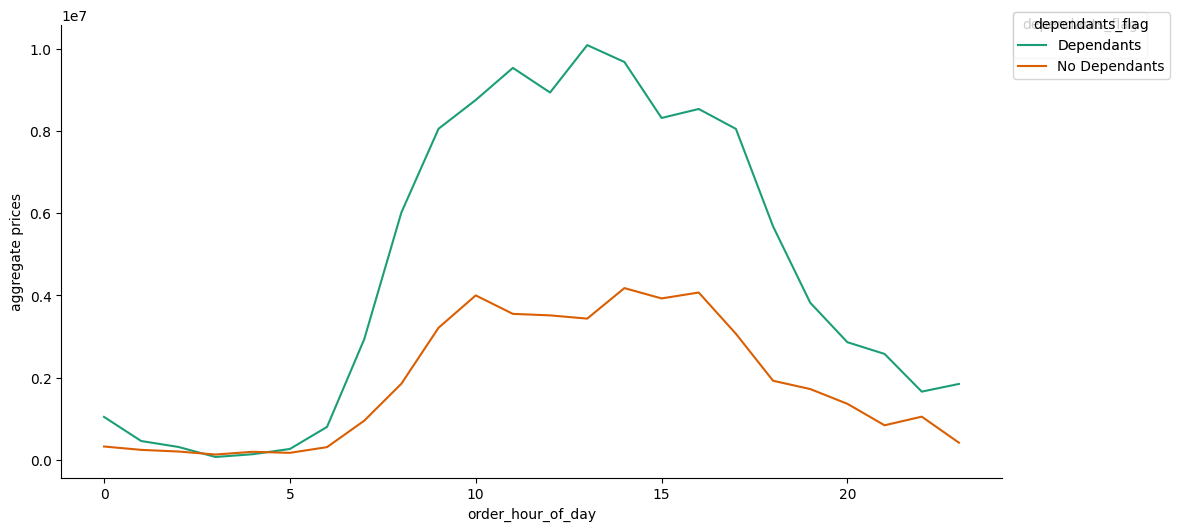

In [150]:
# @title Aggregate Spend by Dependents VS No Dependents - Hour of the Day


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_hour_of_day']
  ys = series['prices']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = orders_agg_busiest_hour_dependents.sort_values('order_hour_of_day', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('dependants_flag')):
  _plot_series(series, series_name, i)
  fig.legend(title='dependants_flag', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_hour_of_day')
_ = plt.ylabel('aggregate prices')

There is a similar pattern among customers with dependents vs those with now dependents. There is more order activity during the work hours of 9-5

# 13. Instacart has a lot of products with different price tags. Marketing and Sales want to use simplier price range groupings to help direct their efforts.

In [151]:
# Create a sample only showing price_range_loc
sample = df_final[['price_range_loc']]

Text(0.5, 1.0, 'Count of Products in Price Ranges')

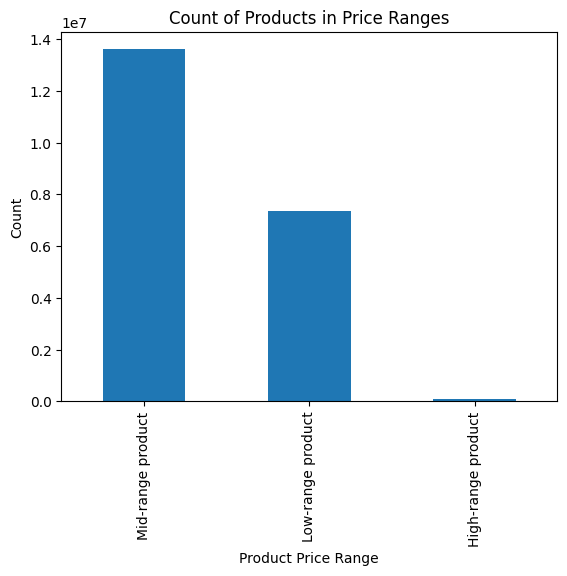

In [152]:
# Create a bar chart showing the price_range_loc counts
bar0 = sample['price_range_loc'].value_counts().plot.bar()

# Add labels and title
plt.xlabel('Product Price Range')
plt.ylabel('Count')
plt.title('Count of Products in Price Ranges')

# 13.1 Price Tags by Income Group

In [153]:
df_final.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'first_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'Busiest_Days(plural)',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'customer_frequency', 'frequency_flag', '_merge',
       'region', 'customer_activity_flag', 'age_group', 'dependants_flag',
       'income_class', 'order_day_type', 'department_name', 'merge2'],
      dtype='object')

In [154]:
# Create a new dataframe with only age group and price rand loc
df_age_group_price_range = df_final[['age_group', 'price_range_loc']]

In [155]:
df_age_group_price_range.head()

,age_group,price_range_loc
0,Adult,Mid-range product
1,Adult,Mid-range product
2,Adult,Mid-range product
3,Adult,Mid-range product
4,Adult,Mid-range product


In [156]:
df_age_group_price_range.shape

(21023676, 2)

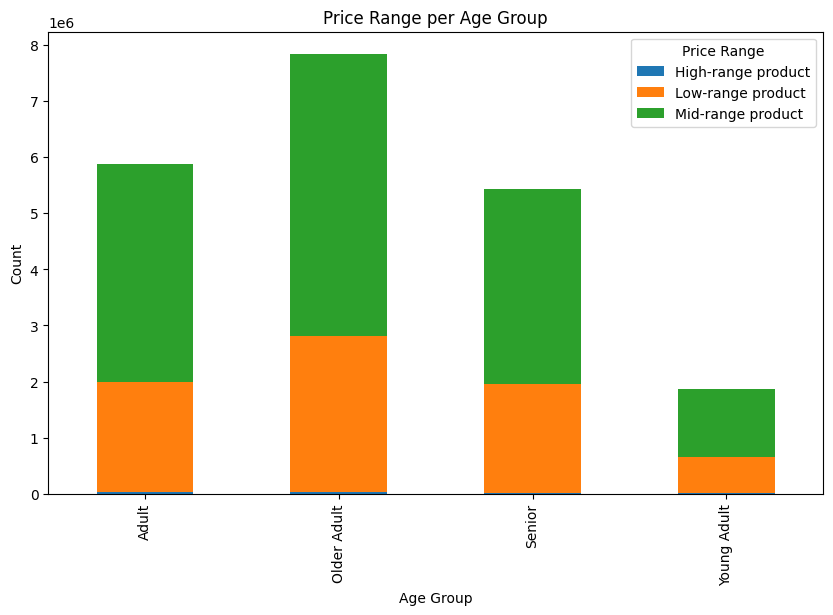

In [157]:
# Group by 'age_group' and 'price_range_loc' to count occurrences
age_group_price_range_counts = df_age_group_price_range.groupby(['age_group', 'price_range_loc']).size().unstack(fill_value=0)

# Plotting the bar chart
bar_stack = age_group_price_range_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Price Range per Age Group')
plt.legend(title='Price Range')

# Show the plot
plt.show()

# 13.2 Price Tags by Age Range

In [158]:
# Create a dataframe with only income class and price range
df_income_class_price_range = df_final[['income_class', 'price_range_loc']]

In [159]:
df_income_class_price_range.head()

,income_class,price_range_loc
0,Median Class Income,Mid-range product
1,Median Class Income,Mid-range product
2,Median Class Income,Mid-range product
3,Median Class Income,Mid-range product
4,Median Class Income,Mid-range product


In [160]:
df_income_class_price_range.shape

(21023676, 2)

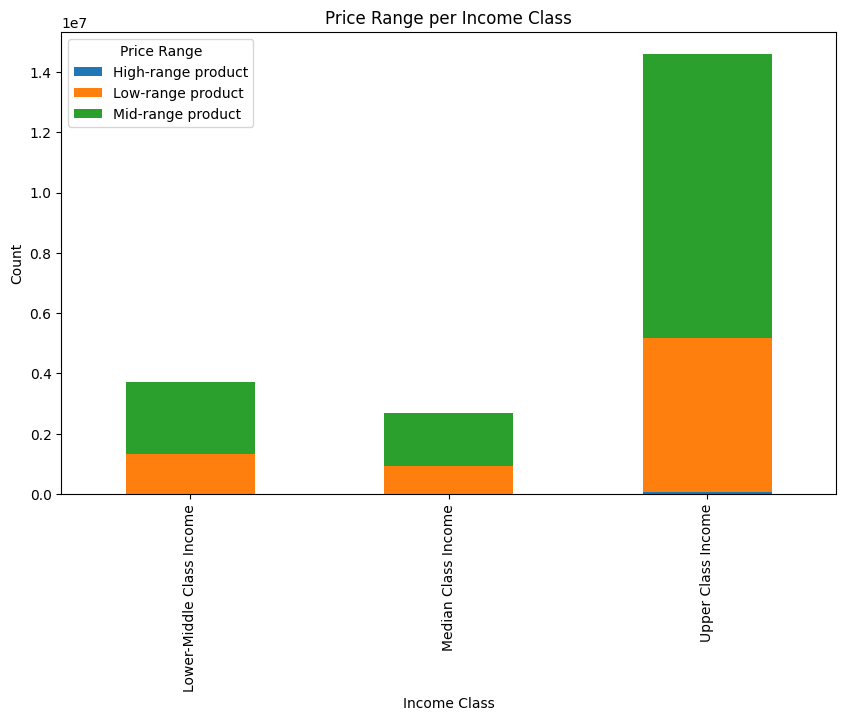

In [161]:
# Group by 'income_class' and 'price_range_loc' to count occurrences
income_class_price_range_counts = df_income_class_price_range.groupby(['income_class', 'price_range_loc']).size().unstack(fill_value=0)

# Plotting the bar chart
bar_stack2 = income_class_price_range_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.title('Price Range per Income Class')
plt.legend(title='Price Range')

# Show the plot
plt.show()

In [162]:
df_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_data.pkl'))